Stock price analysis has been a critical area of research and is one of the top applications of machine learning. Here, we will use an LSTM network to train our model with Netflix stocks data.

# Stock Market?
A stock market is a public market where you can buy and sell shares for publicly listed companies. The stocks, also known as equities, represent ownership in the company. The stock exchange is the mediator that allows the buying and selling of shares.  
# Importance?
Stock markets help companies to raise capital.  
It helps generate personal wealth.  
Stock markets serve as an indicator of the state of the economy.  
It is a widely used source for people to invest money in companies with high growth potential.  
# Stock Price Prediction
Stock Price Prediction using machine learning helps you discover the future value of company stock and other financial assets traded on an exchange. The entire idea of predicting stock prices is to gain significant profits. Predicting how the stock market will perform is a hard task to do. There are other factors involved in the prediction, such as physical and psychological factors, rational and irrational behavior, and so on. All these factors combine to make share prices dynamic and volatile. This makes it very difficult to predict stock prices with high accuracy.  

# Understanding Long Short Term Memory Network
Here, we will use a Long Short Term Memory Network (LSTM) for building your model to predict the stock prices of Google.

LTSMs are a type of Recurrent Neural Network for learning long-term dependencies. It is commonly used for processing and predicting time-series data.  
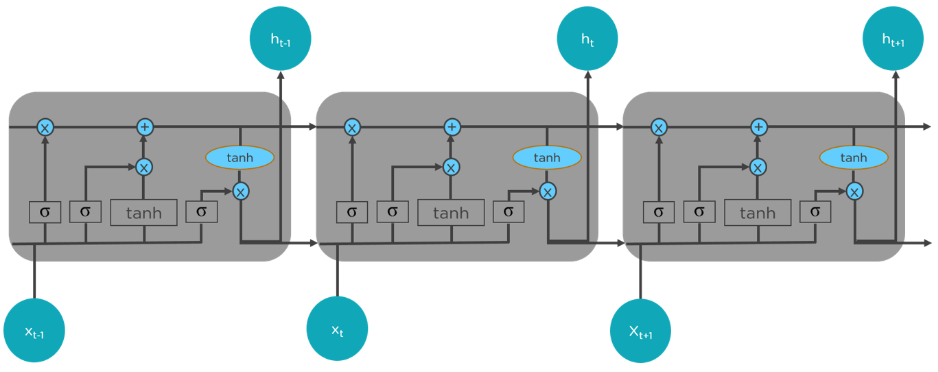  
From the image on the top, you can see LSTMs have a chain-like structure. General RNNs have a single neural network layer. LSTMs, on the other hand, have four interacting layers communicating extraordinarily.  
LSTMs work in a three-step process.  
The first step in LSTM is to decide which information to be omitted from the cell in that particular time step. It is decided with the help of a sigmoid function. It looks at the previous state (ht-1) and the current input xt and computes the function.  
There are two functions in the second layer. The first is the sigmoid function, and the second is the tanh function. The sigmoid function decides which values to let through (0 or 1). The tanh function gives the weightage to the values passed, deciding their level of importance from -1 to 1.  
The third step is to decide what will be the final output. First, you need to run a sigmoid layer which determines what parts of the cell state make it to the output. Then, you must put the cell state through the tanh function to push the values between -1 and 1 and multiply it by the output of the sigmoid gate.

# Netflix Stock Price Prediction with Machine Learning

To predict the stock prices of Netflix with machine learning, We will be using the LSTM neural network as it is one of the best approaches for regression analysis and time series forecasting. So here, I will start by importing the necessary Python libraries and collecting the latest stock price data of Netflix:

Import Libraries and load data set

In [111]:
import requests

import pip
pip.main(['install', 'pandas_datareader'])

import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as web
import yfinance as yf
import datetime
from datetime import date, timedelta

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [112]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = web.DataReader('NFLX', data_source= 'yahoo', start = start_date, end = end_date)
# data = pd.read_csv('NFLX.csv')

# data = yf.download('NFLX', start=start_date, end=end_date, progress=False)
# data["Date"] = data.index
# data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
# data.reset_index(drop = True, inplace = True)
print(data.tail())

                  High         Low        Open       Close     Volume  \
Date                                                                    
2022-08-22  233.479996  224.589996  232.550003  226.539993  8630100.0   
2022-08-23  229.899994  224.300003  226.460007  224.550003  5276900.0   
2022-08-24  234.100006  223.940002  225.660004  229.610001  5426300.0   
2022-08-25  234.160004  229.000000  230.240005  233.979996  3759300.0   
2022-08-26  236.904999  225.419998  233.625000  226.020004  2599552.0   

             Adj Close  
Date                    
2022-08-22  226.539993  
2022-08-23  224.550003  
2022-08-24  229.610001  
2022-08-25  233.979996  
2022-08-26  226.020004  


In [113]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-16,4.250000,4.031429,4.142857,4.092857,9816800.0,4.092857
2008-12-17,4.155714,3.987143,4.077143,4.112857,6004600.0,4.112857
2008-12-18,4.130000,3.964286,4.085714,4.034286,5366200.0,4.034286
2008-12-19,4.142857,3.902857,4.111429,3.955714,15471400.0,3.955714
2008-12-22,4.042857,3.860000,4.038571,3.988571,8297100.0,3.988571


In [114]:
data.shape

(3448, 6)

In [115]:
start_date

'2008-12-17'

In [116]:
end_date

'2022-08-26'

Open: The price of the stock at the beginning of the trading day.

High: The highest price of the stock on a trading day.

Low: The lowest price of the stock on a trading day.

Close: The last price of the stock before the trading day ends.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3448 entries, 2008-12-16 to 2022-08-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3448 non-null   float64
 1   Low        3448 non-null   float64
 2   Open       3448 non-null   float64
 3   Close      3448 non-null   float64
 4   Volume     3448 non-null   float64
 5   Adj Close  3448 non-null   float64
dtypes: float64(6)
memory usage: 188.6 KB


In [118]:
# Check the Null and NA values
print("Null values:", data.isnull().values.sum())
print("NA values:", data.isna().values.any())

Null values: 0
NA values: False


The above dataset is collected using the yfinance API in Python. Now let’s visualize the stock price data of Netflix by using a candlestick chart as it gives a clear picture of the increase and decrease of stock prices:

In [119]:
!pip install plotly

In [120]:
import plotly.graph_objects as go
data["Date"] = data.index

figure = go.Figure(data=[go.Candlestick(x=data["Date"], open=data["Open"], 
                                        high=data["High"], low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()
             

Now let’s have a look at the correlation of all the columns with the Close column:

In [121]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.999819
Low          0.999811
Open         0.999601
Volume      -0.421429
Name: Close, dtype: float64


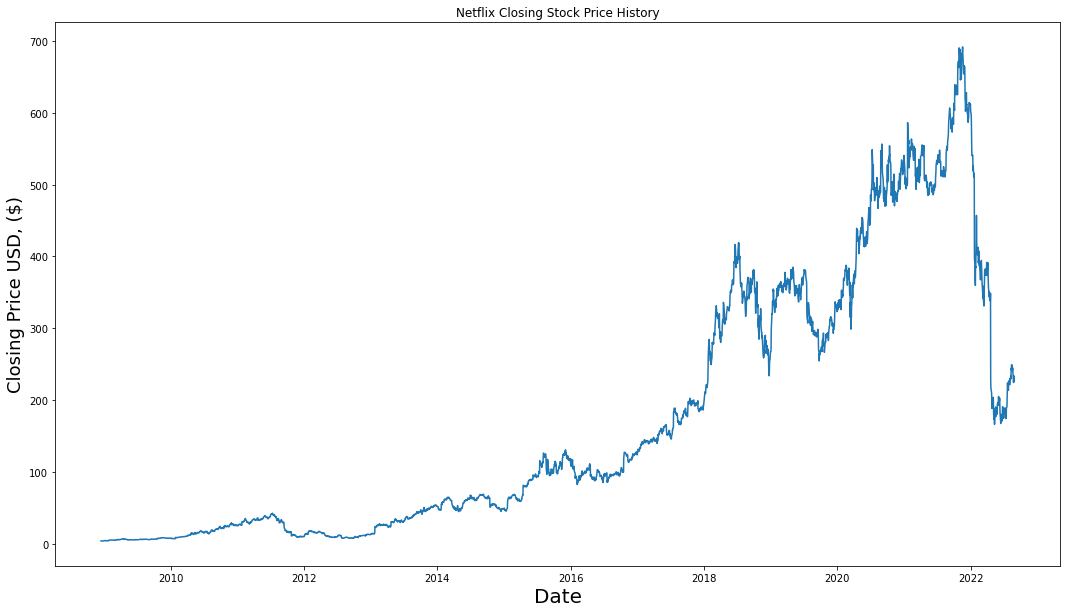

In [122]:
# Closing Price Stock Visual
# visualise the dataset and the closing price history through this period
# create a plot using the relevant variables

plt.figure(figsize=(18,10))
plt.title('Netflix Closing Stock Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Closing Price USD, ($)', fontsize= 18)
plt.show()

In [123]:
# Create a new dataframe with a close column 
data= data.filter(['Close'])

# Convert the dataframe into a numpy array
dataset = data.values

# Get the rows so the model can be trained 

training_data_len = math.ceil(len(dataset) * 0.8) # training the data on about 80% and round the numbers up
training_data_len #print the length of the training dataset. 

2759

In [124]:
data

,Close
Date,
2008-12-16,4.092857
2008-12-17,4.112857
2008-12-18,4.034286
2008-12-19,3.955714
2008-12-22,3.988571
...,...
2022-08-22,226.539993
2022-08-23,224.550003
2022-08-24,229.610001


In [125]:
dataset

array([[  4.09285688],
       [  4.11285686],
       [  4.03428602],
       ...,
       [229.61000061],
       [233.97999573],
       [226.02000427]])

In [126]:
# Scale the data as applying pre-processing is beneficial, helping the model before using neural network

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.11547382e-04],
       [3.40625091e-04],
       [2.26391975e-04],
       ...,
       [3.28187959e-01],
       [3.34541437e-01],
       [3.22968510e-01]])

In [127]:
# will be using the dataset which is used for ***training***

train_data = scaled_data[0:training_data_len, :]


# a_train & # b_train *** split training dataset into a and b.

a_train = []
b_train = []

for i in range(60, len(train_data)):
    a_train.append(train_data[i-60:i, 0])
    b_train.append(train_data[i, 0])
    if i<= 61:
        print(a_train)
        print(b_train)
        print()

[array([3.11547382e-04, 3.40625091e-04, 2.26391975e-04, 1.12157127e-04,
       1.59927402e-04, 0.00000000e+00, 5.40017079e-05, 2.72084528e-04,
       1.62005124e-04, 3.13625104e-04, 5.69093402e-04, 5.64939344e-04,
       9.94874593e-04, 1.20257262e-03, 1.15480165e-03, 1.24618883e-03,
       1.06133743e-03, 8.43254266e-04, 7.87176569e-04, 4.96398782e-04,
       9.28411059e-04, 8.53639410e-04, 5.56631923e-04, 7.35252237e-04,
       7.66406282e-04, 6.83326518e-04, 6.23095457e-04, 1.59304570e-03,
       1.87135993e-03, 2.02090254e-03, 1.86720657e-03, 2.03544174e-03,
       1.99182483e-03, 2.01467284e-03, 2.14344515e-03, 2.04582688e-03,
       2.03336540e-03, 1.87343765e-03, 1.87343765e-03, 2.23898570e-03,
       2.36568169e-03, 2.09152082e-03, 2.04582688e-03, 2.06451945e-03,
       2.00428769e-03, 1.75089573e-03, 1.85059172e-03, 1.79451195e-03,
       1.79243631e-03, 1.88797686e-03, 1.49542743e-03, 1.91290051e-03,
       2.19329315e-03, 2.23275600e-03, 2.29091142e-03, 2.35737426e-03,
     

In [128]:
len(train_data)

2759

In [129]:
# converting training data sets into numpy arrays 

a_train, b_train = np.array(a_train), np.array(b_train)

In [130]:
#rehspaing the data as the LTSM expects to be in 3 dimensional shape. Currently at 2 dimensional
a_train = np.reshape(a_train, (a_train.shape[0], a_train.shape[1], 1))
a_train.shape # two dimensional using rows x columns

(2699, 60, 1)

## Building the LSTM Model

In [131]:
## Building the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (a_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [132]:
# Compiling the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

In [133]:
## Train the model
model.fit(a_train, b_train, batch_size=1, epochs=1)

2699/2699 [==============================] - 68s 24ms/step - loss: 5.8644e-04


In [134]:
## Forming the new testing dataset 
## Creating a new array 

test_data = scaled_data[training_data_len - 60: , :]

# creating datasets a_test and b_test

a_test = []
b_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    a_test.append(test_data[i-60:i, 0])

In [135]:
# Convert testing dataset in a numpy array to use in the LSTM Model 

a_test = np.array(a_test)

In [136]:
# Reshape the data as data is 2 dimemsional but it needs to be 3 dimensional

a_test = np.reshape(a_test, (a_test.shape[0], a_test.shape[1], 1))

In [137]:
## Obtain the predicted prices from the models
# want the predictions to contain the same values as b_test dataset

predictions = model.predict(a_test)
predictions = scaler.inverse_transform(predictions) 

In [138]:
# obtain the root mean to check for model accuracy RMSE

rmse = np.sqrt(np.mean(predictions - b_test)**2)
rmse

11.08281837319428

<ipython-input-139-aafffec576f6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



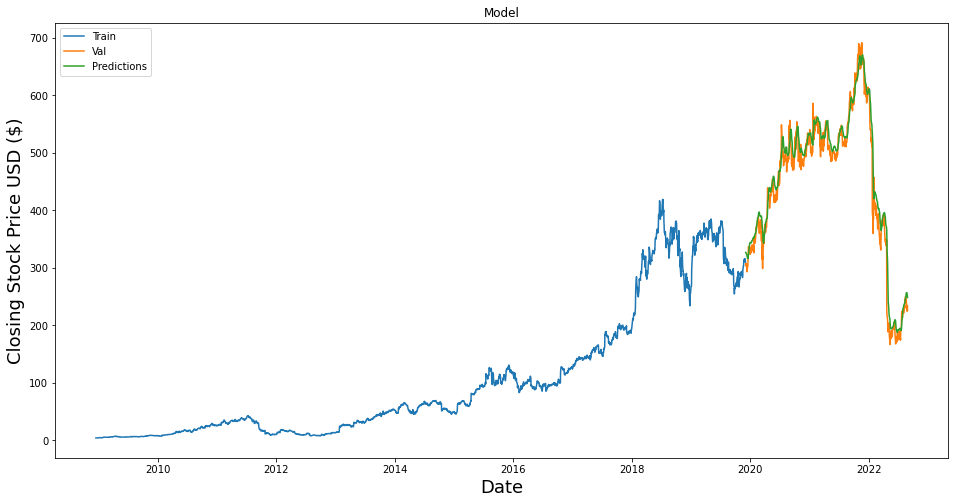

In [139]:
# plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualise the data through a plot

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Stock Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()


In [140]:
# comment: predictions and actual values are pretty close 
# get the actual closing price and predicted closing price in a table
valid

,Close,Predictions
Date,,
2019-12-03,306.160004,326.964478
2019-12-04,304.320007,326.720428
2019-12-05,302.859985,325.789948
2019-12-06,307.350006,324.450531
2019-12-09,302.500000,323.556824
...,...,...
2022-08-22,226.539993,256.847443
2022-08-23,224.550003,255.124207
2022-08-24,229.610001,252.336304


In [141]:
netflix_quote = web.DataReader('NFLX', data_source='yahoo', start= '2012-01-01', end= '2022-01-25')
# new dataframe for last 60 day closing price
new_df = netflix_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
A_test = []
A_test.append(last_60_days_scaled)
A_test = np.array(A_test)
A_test = np.reshape(A_test, (A_test.shape[0], A_test.shape[1], 1))
pred_price = model.predict(A_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[474.23636]]


In [142]:
# the model predicts that the closing price of netflix stock on 26th january 2022 will be 474.23

In [143]:
# actual closing price of netflix stock on 26th january 2022 was:
netflix_quote1 = web.DataReader('NFLX', data_source='yahoo', start= '2022-01-26', end= '2022-01-26')
print(netflix_quote1['Close'])

Date
2022-01-25    366.420013
2022-01-26    359.700012
Name: Close, dtype: float64


## More Predictions:

In [144]:
netflix_quote4 = web.DataReader('NFLX', data_source='yahoo', start= '2012-01-01', end= '2022-01-26')
# new dataframe for last 60 day closing price
new_df = netflix_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
A_test = []
A_test.append(last_60_days_scaled)
A_test = np.array(A_test)
A_test = np.reshape(A_test, (A_test.shape[0], A_test.shape[1], 1))
pred_price = model.predict(A_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[474.23636]]


In [145]:
# netflix_quote_4 predicts that the closing price of netflix stock on 27th january 2022 will be $474.23

In [146]:
# actual closing price of netflix stock on 27th january 2022 was:
netflix_quote5 = web.DataReader('NFLX', data_source='yahoo', start= '2022-01-27', end= '2022-01-27')
print(netflix_quote1['Close'])

Date
2022-01-25    366.420013
2022-01-26    359.700012
Name: Close, dtype: float64


## Comments:
This model was used to predict the future closing price of netflix stock (NFLX) and it was understood that the prediction made by the trained model was off by a distance for the 26th January 2022. The model predicted that the closing price would be 474.23 however the actual price recorded for the stock by Yahoo was 359.70. A difference of 85.85.